# Testing: taking an image, converting it into a matrix of values from 0 to 255, and manipulating the data 

(1024, 1280, 4)
[[2 3 2 ... 1 1 1]
 [2 2 3 ... 2 2 2]
 [3 3 2 ... 2 1 2]
 ...
 [4 3 4 ... 3 3 3]
 [3 4 4 ... 3 3 3]
 [5 3 5 ... 4 4 3]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


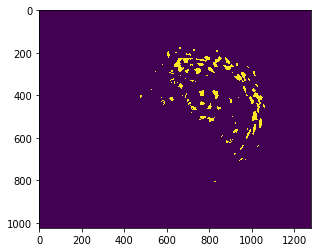

In [57]:
# Import anything we need
# Using https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays as a resource

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# load 
image1 = mpimg.imread('img1_852pt136nm_27_11_2020.tif')
# From what I understand, the result of this will be an array of 3 dimensions: the length and
# width of the image in pixels, and a third dimension that has 4 values per pixel.
# From what I understand, for a .tif image, these four values will be of the RBGA format.
# The first three values for each pixel are the R, G, and B values, and the fourth is the opacity

image1plot = plt.imshow(image1) # Shows the image again

# print(image1) # prints the entire array

print((image1.shape)) # Prints height in pix, width in px, and I suppose number of values per pixel?
# When I call it on img1_852pt136nm_27_11_2020.tif, I get (1024, 1280, 4), and the image does in fact
# have a width of 1280 px and a height of 1024 px


# print(image1[:,:,:-1]) # prints the entire array
# print(np.amax(image1[:, :, 0])) # check max R
# print(np.amax(image1[:, :, 1])) # check max G
# print(np.amax(image1[:, :, 2])) # check max B


# # ==== Checking the distributions of the R, G, and B values in the image
# binlist = list(range(0, 256)) # Use this for the bins when producing the histograms

# r_plot = plt.hist(image1[:, :, 0].flatten(), bins = binlist, color = 'red')
# plt.show()
# g_plot = plt.hist(image1[:, :, 1].flatten(), bins = binlist, color = 'green')
# plt.show()
# b_plot = plt.hist(image1[:, :, 2].flatten(), bins = binlist, color = 'blue')
# plt.show()


# # ==== Checking if every pixel has exactly the same R, G, and B values
# # I'm beginning to think that every pixel has the same R, G, and B values
# # Every one I've manually checked does, at least

# for i in range(0, 1024):
#     for j in range(0, 1280):
#         r_val = image1[i, j, 0]
#         g_val = image1[i, j, 1]
#         b_val = image1[i, j, 2]
        
#         if (r_val != g_val):
#             print(f'At {i}, {j}, r_val {r_val} != g_val {g_val}')
            
#         if (r_val != b_val):
#             print(f'At {i}, {j}, r_val {r_val} != b_val {b_val}')
        
#         if (g_val != b_val):
#             print(f'At {i}, {j}, g_val {g_val} != b_val {b_val}')

# # From the results of this, absolutely nothing was printed, which means that all of the pixels
# # have precisely the same values for the R, G, and B pixels
# # Because of this, I feel like I don't need to use any sort of conversion algorithm from RGB to grayscale;
# # when the image was saved, it probably just put the same value in all 3 columns instead of 
# # just saving directly as a grayscale image.


# Converting from RGBA to grayscale, by simply using the R=G=B values as grayscale values
image1_grayscale = image1[:, :, 0]
print(image1_grayscale)

# # ===== Identifying the location of saturated pixels within the image: ========
# image1_satpixels = np.zeros([1024, 1280])
# for i in range(0, 1024):
#     for j in range(0, 1280):
#         if image1_grayscale[i, j] == 255:
#             image1_satpixels[i,j] = 255
#         else:
#             image1_satpixels[i, j] = 0      
# print(image1_satpixels)
# image1satpixelsplot = plt.imshow(image1_satpixels)  # Plots the location of the saturated pixels



# # ==== Checking the opacity of the pixels: ==========
# print(np.amax(image1[:, :, -1])) # Largest opacity in the whole array
# print(np.amin(image1[:, :, -1])) # Smallest opacity in the whole array
# # Since it seems that every single pixel has an opacity of 255, which to my understanding
# # means that all of the pixels are fully opaque.
# # This is good, since it means that I can pretty much ignore the opacity information






# Attempt 1 at a Working Program 

Done loading images


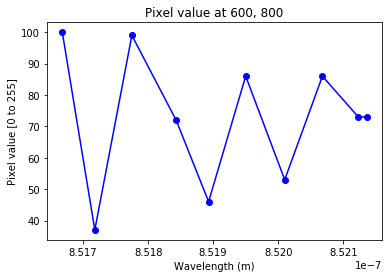

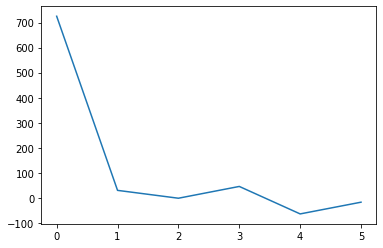

In [2]:
# Import everything needed:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import time

def find_saturated(data_all_images):
    # Identify all elements in the 3D array data_all_images that have a saturated pixel in AT LEAST ONE of the images
    # i.e. set the value to 1 if one of the 10 images has a value of 255 at that location, else set the value to 0
    sat_pixels = np.zeros([height_px, width_px])
    for i in range(0, height_px):
        for j in range(0, width_px):
            if 255 in data_all_images[i,j]:
                sat_pixels[i, j] = 1 # This pixel is saturated in at least one of the images
            else:
                sat_pixels[i, j] = 0
    # plt.imshow(sat_pixels)  # Plots the location of pixels that are saturated in at least ONE of the images
    return sat_pixels

def plot_pixel_values_vs_wavelengths(wavelengths, pixel_values, index1, index2):
    fig, ax = plt.subplots()
    ax.plot(wavelengths, pixel_values, 'bo-')
    ax.set_xlabel('Wavelength (m)')
    ax.set_ylabel('Pixel value [0 to 255]')
    ax.set_title(f'Pixel value at {index1}, {index2}')
    plt.show()
    return

# Define important variables up here:
width_px = 1280 # Width of pictures in pixels
height_px = 1024 # Height of pictures in pixels
nm = 1e-9

# Identify the names of all of the images of interest (in the same directory as this notebook)
img_filenames = ['img1_852pt136nm_27_11_2020.tif',
                'img2_852pt1232nm_27_11_2020.tif',
                'img3_852pt068nm_27_11_2020.tif',
                'img4_852pt010nm_27_11_2020.tif',
                'img5_851pt950nm_27_11_2020.tif',
                'img6_851pt893nm_27_11_2020.tif',
                'img7_851pt834nm_27_11_2020.tif',
                'img8_851pt775nm_27_11_2020.tif',
                'img9_851pt718nm_27_11_2020.tif',
                'img10_851pt668nm_27_11_2020.tif']

wavelengths = [852.136*nm,
               852.1232*nm,
               852.068*nm,
               852.010*nm,
               851.950*nm,
               851.893*nm,
               851.843*nm,
               851.775*nm,
               851.718*nm,
               851.668*nm]
# Note: It's critical that the wavelengths be listed in the same order as their corresponding filenames
# Load in the images, and store them in a dictionary:

images = {} # Define a dictionary in which I'll store the images
for i in list(range(0,10)):
    imgname = 'image' + str(i+1)
    images[imgname] = mpimg.imread(img_filenames[i])
print('Done loading images')

# Get a list of the names of all of the image arrays, which can be used to access the image arrays
# in the dictionary {images}
image_keys = []
for key in images:
    image_keys.append(key)
    

# # Just to make sure that everything is working up until now, let's try saving the images again (under different names)
# # and viewing them to make sure that they're the same images:
# for key in image_keys:
#     plt.imsave(str(key) + '.png', images[key])  # Saves the images under new names

    
# Converting from RGBA to grayscale, by simply using the R=G=B values as grayscale values.
# Store the grayscale versions of the images in a new dictionary, images_grayscale
images_grayscale = {}
for key in images:
    images_grayscale[key + '_grayscale'] = (images[key])[:, :, 0]

# Get a list of the names of all of the GRAYSCALE image arrays in {images_grayscale}
grayscaleimage_keys = []
for key in images_grayscale:
    grayscaleimage_keys.append(key)

# # Now let's try saving the grayscale images; they should look the same, still
# for key in grayscaleimage_keys:
#     plt.imsave(str(key) + '.png', images_grayscale[key])  # Saves the grayscale images
# # Turns out that imsave colormaps the images before it saves them, so don't take this too seriously



# Next, I want to try to get ALL of the data (i.e. from all of the images) into a single file.
# At least for now, I'm going to assume that the camera stays stationary enough that the same pixel in all of the 
# different images corresponds to the same point in space.
# Not assuming this would make life a lot more difficult; would have to identify a reference point of some sort, and align
# everything to that.

# I think that I can do this with a single 3D array, data_all_images
data_all_images = np.zeros([height_px, width_px, len(grayscaleimage_keys)]) # Using len(grayscaleimage_keys) for the # of images
for i in range(0, height_px):
    for j in range(0, width_px):
        for k in range(0, len(grayscaleimage_keys)):
            key = grayscaleimage_keys[k]
            data_all_images[i,j,k] = images_grayscale[key][i, j]

# Find the pixels that are saturated in at least ONE of the images
sat_pixels = find_saturated(data_all_images)


# Now, let's try to get a plot something like Fig. 2b of "Spatially and spectrally resolved imaging of modal content in
# large-mode-area fibers" by Nicholson et al.
# They just picked an arbitrary x-y, so I'll do the same:
index1 = 600
index2 = 800
pixel_values = data_all_images[index1, index2]
# print(sat_pixels[600,600]) # Check to make sure that the selected pixel isn't saturated in any of the images
# Checking manually for now, will do with code once I have more than one pixel being dealt with at a time

# Plot the pixel values against the wavelengths
plot_pixel_values_vs_wavelengths(wavelengths, pixel_values, index1, index2)


# ============ Fourier Stuff Below ===================


# Next, let's try the Fast Fourier Transform bit. Going to use the numpy.fft functions to do this
fourier_transformed = np.fft.rfft(pixel_values)

plt.plot(fourier_transformed)
plt.show()

## Testing with the data from Fig 2b of the S2 imaging paper

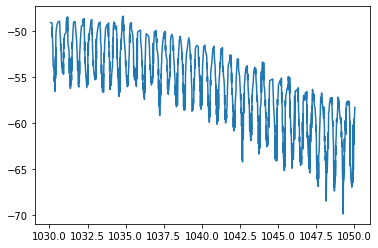

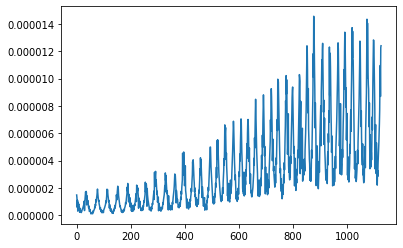

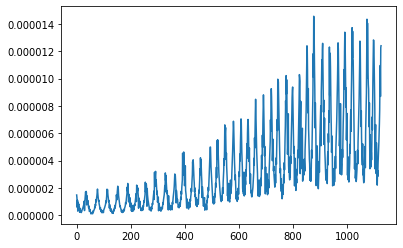

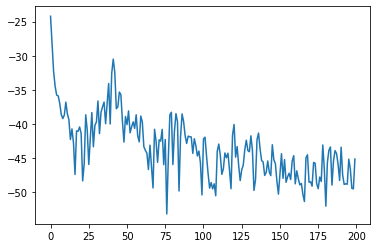

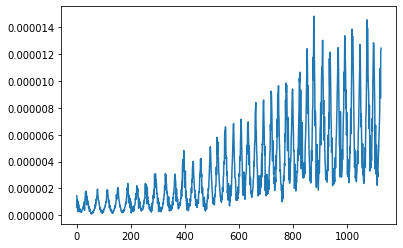

In [2]:
# The idea here is basically to use the data from the paper and run it through a Fast Fourier Transform using the methods that I plan to use for the actual program.
# If the output I get looks like Fig 2b, then it probably means that I'm doing the right thing


# The data in the image was converted to numerical data using WebPlotDigitizer, available at https://apps.automeris.io/wpd/
# Data was downloaded from there as a .csv file

# Getting the data from the .csv file:
import csv
import numpy as np
import matplotlib.pyplot as plt


def power_unit_converter(power_in_db):
    power_in_mw = 1 * 10 ** (power_in_db * 0.1)
    return power_in_mw

def transformed_unit_converter(linear_value):
    value_in_db = 10 * np.log10(linear_value / 1)
    return value_in_db

# Create an array where I'm going to store all of the data from the .csv file
data_array = np.zeros([1127, 2])


with open('Data 2.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    line_count = 0
    i = 0 # Just a counting variable
    for row in csv_reader:
        data_array[i, 0] = row[0]
        data_array[i, 1] = row[1]
        i += 1
        
# data_array now contains the data from the plot
# Can plot this:
plt.plot(data_array[:,0], data_array[:, 1])
plt.show()
# The plot of this data looks just like the figure from the paper, so it 
# looks like this worked well


# The paper says that they're taking the FFT with respect to FREQUENCY, not wavelength
# This means that I'll need to convert this data into being in terms of frequency, somehow.
# Presumably, I can just convert from wavelength to frequency using the speed of light.
# I'm assuming that the wavelengths given are vacuum wavelengths.
c = 299792458 # m/s
wavelengths = data_array[:,0] * (1e-9)
frequencies = np.zeros(wavelengths.shape)
for i in range(0, len(wavelengths)):
    frequencies[i] = c / (wavelengths[i])

data_db_freq_array = np.zeros([len(frequencies), 2])
data_db_freq_array[:, 0] = frequencies[::-1]
data_db_freq_array[:, 1] = data_array[:,1][::-1]

# print(data_db_freq_array)

# plt.plot(data_db_freq_array[:,0], data_db_freq_array[:, 1])
# plt.show()

# Converting the power values from dBm (assuming that dB means dBm, which seems to be a fairly common convention) to mW:

data_mw_freq_array = np.zeros([len(frequencies), 2])
data_mw_freq_array[:, 0] = frequencies[::-1]

for i in range(0, len(frequencies)):
    power_in_db = data_db_freq_array[i, 1]
    power_in_mw = power_unit_converter(power_in_db)
    data_mw_freq_array[i, 1] = power_in_mw

plt.plot(data_mw_freq_array[:,1])
plt.show()

# data_for_fft = data_array[:,1]
# # ====================================================
# # Let's try running this through a FFT and see what happens:
# transformed_data = np.fft.rfft(data_for_fft)
# abs_transformed_data = np.abs(transformed_data)

# plt.plot(abs_transformed_data)
# plt.yscale('log')
# plt.show()

# # =========================================

data_for_fft = data_mw_freq_array[:,1]

plt.plot(data_for_fft)
plt.show()

# Let's try running this through a FFT and see what happens:
transformed_data = np.fft.rfft(data_for_fft)
abs_transformed_data = np.abs(transformed_data)

# Going to try to convert this back from mW (well, mW/s because of the FT I guess...) to decibels
db_abs_transformed_data = np.zeros(len(abs_transformed_data))
for i in range(0, len(abs_transformed_data)):
    linear_value = abs_transformed_data[i]
    value_in_db = transformed_unit_converter(linear_value)
    db_abs_transformed_data[i] = value_in_db

plt.plot(db_abs_transformed_data[:200])
plt.show()

going_back = np.fft.irfft(transformed_data)
plt.plot(going_back)
plt.show()

## Starting with Fig 2c of the paper and using an inverse Fourier transform

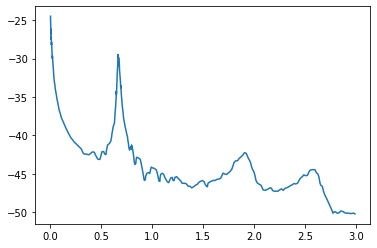

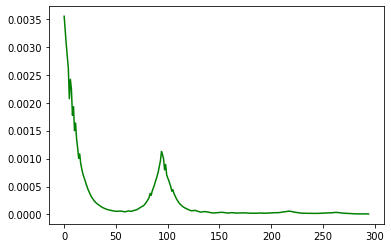

295
588


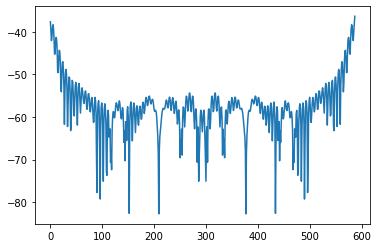

In [22]:
# Getting the data from the .csv file:
import csv
import numpy as np
import matplotlib.pyplot as plt


def power_unit_converter(power_in_db):
    power_in_mw = 1 * 10 ** (power_in_db * 0.1)
    return power_in_mw

def transformed_unit_converter(linear_value):
    value_in_db = 10 * np.log10(linear_value / 1)
    return value_in_db

# Create an array where I'm going to store all of the data from the .csv file
data_db_array = np.zeros([295, 2])


with open('Fig 2c v1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    line_count = 0
    i = 0 # Just a counting variable
    for row in csv_reader:
        data_db_array[i, 0] = row[0]
        data_db_array[i, 1] = row[1]
        i += 1
        
# data_array now contains the data from the plot
# Can plot this:

plt.plot(data_db_array[:,0], data_db_array[:, 1])
plt.show()

# Converting the power values from dBm (assuming that dB means dBm, which seems to be a fairly common convention) to mW:

data_lin_array = np.zeros([len(data_db_array), 2])
data_lin_array[:, 0] = data_db_array[:,0]

for i in range(0, len(data_db_array)):
    power_in_db = data_db_array[i, 1]
    power_in_mw = power_unit_converter(power_in_db)
    data_lin_array[i, 1] = power_in_mw

plt.plot(data_lin_array[:,1], color = 'green')
plt.show()

# data_for_fft = data_array[:,1]
# # ====================================================
# # Let's try running this through a FFT and see what happens:
# transformed_data = np.fft.rfft(data_for_fft)
# abs_transformed_data = np.abs(transformed_data)

# plt.plot(abs_transformed_data)
# plt.yscale('log')
# plt.show()

# # =========================================

data_for_ifft = data_lin_array[:,1]

# Run this data through the inverse FFT:
print(len(data_for_ifft))
transformed_data = np.fft.irfft(data_for_ifft)
print(len(transformed_data))
abs_transformed_data = np.abs(transformed_data)

# Going to try to convert this back from mW (well, mW/s because of the FT I guess...) to decibels
db_abs_transformed_data = np.zeros(len(abs_transformed_data))
for i in range(0, len(abs_transformed_data)):
    linear_value = abs_transformed_data[i]
    value_in_db = transformed_unit_converter(linear_value)
    db_abs_transformed_data[i] = value_in_db

# Now, need to plot this in reverse order to be a function of wavelength instead of frequency:
freq_transformed_data = db_abs_transformed_data[::-1]

plt.plot(freq_transformed_data)
plt.show()

# # === Without the dB to mW stuff:
# plt.plot(data_db_array[:,0], data_db_array[:, 1])
# plt.show()
# new_data = np.fft.irfft(data_db_array[:, 1])
# plt.plot(new_data)
# plt.show()

## Starting with Fig 1a of the paper and applying a Fourier transform

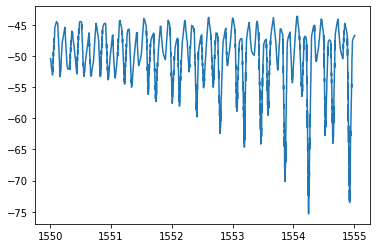

[[1550.00366035  -50.39521857]
 [1550.01046341  -50.9071656 ]
 [1550.01565058  -51.47781168]
 ...
 [1554.97172818  -47.56014253]
 [1554.99323353  -46.93130987]
 [1555.01197546  -46.67066148]]
[[ 1.92791093e+14 -4.66706615e+01]
 [ 1.92793416e+14 -4.69313099e+01]
 [ 1.92796083e+14 -4.75601425e+01]
 ...
 [ 1.93412536e+14 -5.14778117e+01]
 [ 1.93413183e+14 -5.09071656e+01]
 [ 1.93414032e+14 -5.03952186e+01]]


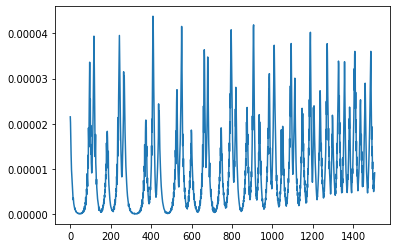

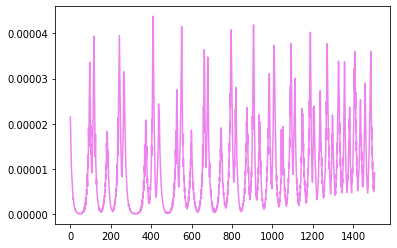

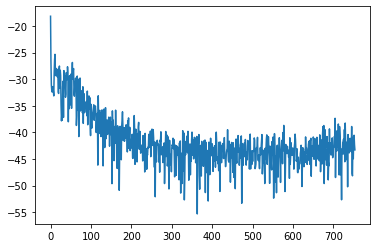

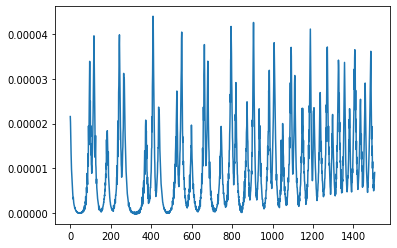

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


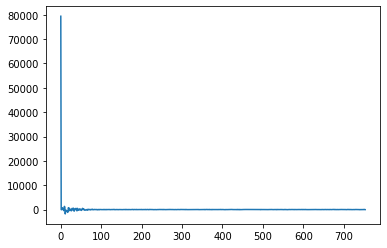

In [3]:
# The idea here is basically to use the data from the paper and run it through a Fast Fourier Transform using the methods that I plan to use for the actual program.
# If the output I get looks like Fig 2b, then it probably means that I'm doing the right thing


# The data in the image was converted to numerical data using WebPlotDigitizer, available at https://apps.automeris.io/wpd/
# Data was downloaded from there as a .csv file

# Getting the data from the .csv file:
import csv
import numpy as np
import matplotlib.pyplot as plt


def power_unit_converter(power_in_db):
    power_in_mw = 1 * 10 ** (power_in_db * 0.1)
    return power_in_mw

def transformed_unit_converter(linear_value):
    value_in_db = 10 * np.log10(linear_value / 1)
    return value_in_db

# Create an array where I'm going to store all of the data from the .csv file
data_array = np.zeros([1507, 2])


with open('Fig 1a v1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    line_count = 0
    i = 0 # Just a counting variable
    for row in csv_reader:
        data_array[i, 0] = row[0]
        data_array[i, 1] = row[1]
        i += 1
        
# data_array now contains the data from the plot
# Can plot this:
plt.plot(data_array[:,0], data_array[:, 1])
plt.show()

print(data_array)
# The plot of this data looks just like the figure from the paper, so it 
# looks like this worked well


# The paper says that they're taking the FFT with respect to FREQUENCY, not wavelength
# This means that I'll need to convert this data into being in terms of frequency, somehow.
# Presumably, I can just convert from wavelength to frequency using the speed of light.
# I'm assuming that the wavelengths given are vacuum wavelengths.
c = 299792458 # m/s
wavelengths = data_array[:,0] * (1e-9)
frequencies = np.zeros(wavelengths.shape)
for i in range(0, len(wavelengths)):
    frequencies[i] = c / (wavelengths[i])

data_db_freq_array = np.zeros([len(frequencies), 2])
data_db_freq_array[:, 0] = frequencies[::-1]
data_db_freq_array[:, 1] = data_array[:,1][::-1]

print(data_db_freq_array)

# plt.plot(data_db_freq_array[:,0], data_db_freq_array[:, 1])
# plt.show()

# Converting the power values from dBm (assuming that dB means dBm, which seems to be a fairly common convention) to mW:

data_mw_freq_array = np.zeros([len(frequencies), 2])
data_mw_freq_array[:, 0] = frequencies[::-1]

for i in range(0, len(frequencies)):
    power_in_db = data_db_freq_array[i, 1]
    power_in_mw = power_unit_converter(power_in_db)
    data_mw_freq_array[i, 1] = power_in_mw

plt.plot(data_mw_freq_array[:,1])
plt.show()


# data_for_fft = data_array[:,1]
# # ====================================================
# # Let's try running this through a FFT and see what happens:
# transformed_data = np.fft.rfft(data_for_fft)
# abs_transformed_data = np.abs(transformed_data)

# plt.plot(abs_transformed_data)
# plt.yscale('log')
# plt.show()

# # =========================================

data_for_fft = data_mw_freq_array[:,1]

plt.plot(data_for_fft, color = 'violet')
plt.show()

# Let's try running this through a FFT and see what happens:
transformed_data = np.fft.rfft(data_for_fft)
abs_transformed_data = np.abs(transformed_data)

# plt.plot(abs_transformed_data, color = 'orange')
# plt.show()

# Going to try to convert this back from mW (well, mW/s because of the FT I guess...) to decibels
db_abs_transformed_data = np.zeros(len(abs_transformed_data))
for i in range(0, len(abs_transformed_data)):
    linear_value = abs_transformed_data[i]
    value_in_db = transformed_unit_converter(linear_value)
    db_abs_transformed_data[i] = value_in_db

plt.plot(db_abs_transformed_data[:])
plt.show()

going_back = np.fft.irfft(transformed_data)
plt.plot(going_back)
plt.show()

plt.plot(np.fft.rfft(np.abs(data_array[:, 1])))
plt.show()

## Starting with Fig 1b of paper #2 and using an inverse Fourier transform

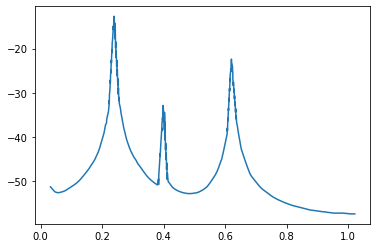

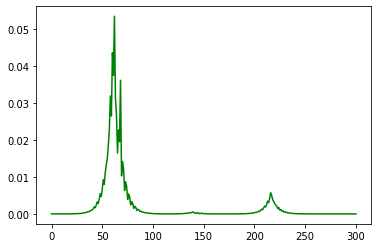

301
600


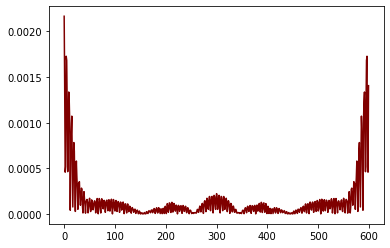

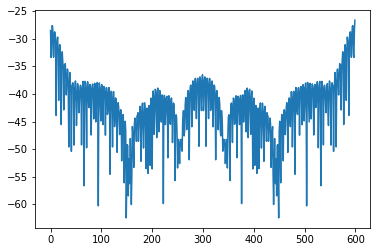

In [49]:
# Getting the data from the .csv file:
import csv
import numpy as np
import matplotlib.pyplot as plt


def power_unit_converter(power_in_db):
    power_in_mw = 1 * 10 ** (power_in_db * 0.1)
    return power_in_mw

def transformed_unit_converter(linear_value):
    value_in_db = 10 * np.log10(linear_value / 1)
    return value_in_db

# Create an array where I'm going to store all of the data from the .csv file
data_db_array = np.zeros([301, 2])


with open('Fig 1b v1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    line_count = 0
    i = 0 # Just a counting variable
    for row in csv_reader:
        data_db_array[i, 0] = row[0]
        data_db_array[i, 1] = row[1]
        i += 1
        
# data_array now contains the data from the plot
# Can plot this:

plt.plot(data_db_array[:,0], data_db_array[:, 1])
plt.show()

# Converting the power values from dBm (assuming that dB means dBm, which seems to be a fairly common convention) to mW:

data_lin_array = np.zeros([len(data_db_array), 2])
data_lin_array[:, 0] = data_db_array[:,0]

for i in range(0, len(data_db_array)):
    power_in_db = data_db_array[i, 1]
    power_in_mw = power_unit_converter(power_in_db)
    data_lin_array[i, 1] = power_in_mw

plt.plot(data_lin_array[:,1], color = 'green')
plt.show()

# data_for_fft = data_array[:,1]
# # ====================================================
# # Let's try running this through a FFT and see what happens:
# transformed_data = np.fft.rfft(data_for_fft)
# abs_transformed_data = np.abs(transformed_data)

# plt.plot(abs_transformed_data)
# plt.yscale('log')
# plt.show()

# # =========================================

data_for_ifft = data_lin_array[:,1]

# Run this data through the inverse FFT:
print(len(data_for_ifft))
transformed_data = np.fft.irfft(data_for_ifft)
print(len(transformed_data))
abs_transformed_data = np.abs(transformed_data)

plt.plot(abs_transformed_data, color = 'maroon')
plt.show()

# Going to try to convert this back from mW (well, mW/s because of the FT I guess...) to decibels
db_abs_transformed_data = np.zeros(len(abs_transformed_data))
for i in range(0, len(abs_transformed_data)):
    linear_value = abs_transformed_data[i]
    value_in_db = transformed_unit_converter(linear_value)
    db_abs_transformed_data[i] = value_in_db

# Now, need to plot this in reverse order to be a function of wavelength instead of frequency:
freq_transformed_data = db_abs_transformed_data[::-1]

plt.plot(freq_transformed_data)
plt.show()

# # === Without the dB to mW stuff:
# plt.plot(data_db_array[:,0], data_db_array[:, 1])
# plt.show()
# new_data = np.fft.irfft(data_db_array[:, 1])
# plt.plot(new_data)
# plt.show()

In [30]:
# They just picked an arbitrary x-y, so I'll do the same:
pixel_values = data_all_images[600, 800]
print(pixel_values)
print(type(pixel_values))


[ 73.  73.  86.  53.  86.  46.  72.  99.  37. 100.]
<class 'numpy.ndarray'>


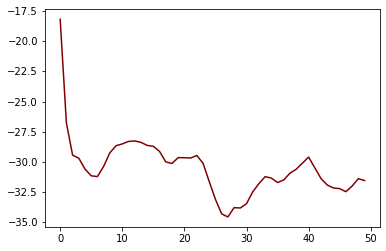

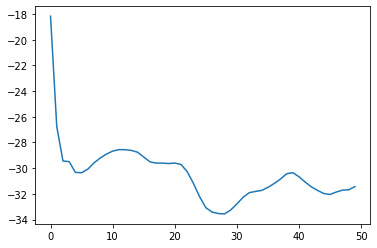

In [65]:
plt.plot(copy_data[:50], color = 'maroon')
plt.show()
copy_2 = copy_data

for i in range(3, len(copy_data)-2):
    copy_2[i] = (copy_data[i-2] + copy_data[i-1] + copy_data[i+1] + copy_data[i+2]) * 0.25
    
plt.plot(copy_2[:50])
plt.show()

## Trying perfectly even spacing on the x values. Using dx = 0.02 units

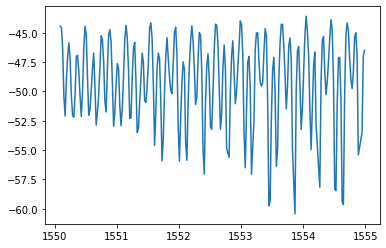

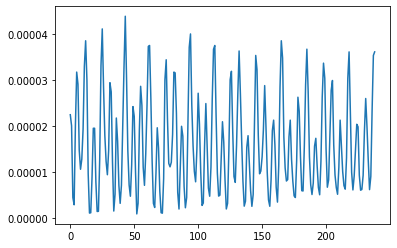

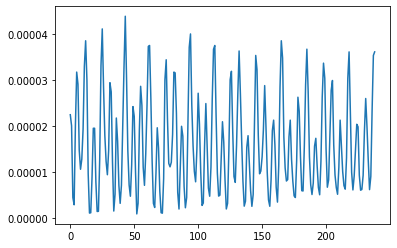

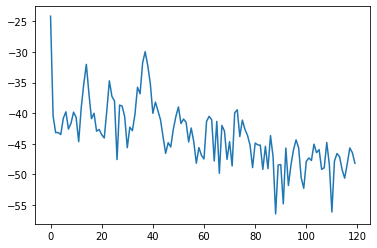

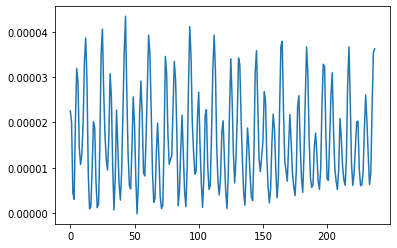

In [5]:
# This for the dx = 0.02 units test

# Getting the data from the .csv file:
import csv
import numpy as np
import matplotlib.pyplot as plt


def power_unit_converter(power_in_db):
    power_in_mw = 1 * 10 ** (power_in_db * 0.1)
    return power_in_mw

def transformed_unit_converter(linear_value):
    value_in_db = 10 * np.log10(linear_value / 1)
    return value_in_db

# Create an array where I'm going to store all of the data from the .csv file
data_array = np.zeros([239, 2])


with open('Fig 1a Even Spacing 0.2.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    line_count = 0
    i = 0 # Just a counting variable
    for row in csv_reader:
        data_array[i, 0] = row[0]
        data_array[i, 1] = row[1]
        i += 1
        
# data_array now contains the data from the plot
# Can plot this:
plt.plot(data_array[:,0], data_array[:, 1])
plt.show()
# The plot of this data looks just like the figure from the paper, so it 
# looks like this worked well


# The paper says that they're taking the FFT with respect to FREQUENCY, not wavelength
# This means that I'll need to convert this data into being in terms of frequency, somehow.
# Presumably, I can just convert from wavelength to frequency using the speed of light.
# I'm assuming that the wavelengths given are vacuum wavelengths.
c = 299792458 # m/s
wavelengths = data_array[:,0] * (1e-9)
frequencies = np.zeros(wavelengths.shape)
for i in range(0, len(wavelengths)):
    frequencies[i] = c / (wavelengths[i])

data_db_freq_array = np.zeros([len(frequencies), 2])
data_db_freq_array[:, 0] = frequencies[::-1]
data_db_freq_array[:, 1] = data_array[:,1][::-1]

# print(data_db_freq_array)

# plt.plot(data_db_freq_array[:,0], data_db_freq_array[:, 1])
# plt.show()

# Converting the power values from dBm (assuming that dB means dBm, which seems to be a fairly common convention) to mW:

data_mw_freq_array = np.zeros([len(frequencies), 2])
data_mw_freq_array[:, 0] = frequencies[::-1]

for i in range(0, len(frequencies)):
    power_in_db = data_db_freq_array[i, 1]
    power_in_mw = power_unit_converter(power_in_db)
    data_mw_freq_array[i, 1] = power_in_mw

plt.plot(data_mw_freq_array[:,1])
plt.show()

# data_for_fft = data_array[:,1]
# # ====================================================
# # Let's try running this through a FFT and see what happens:
# transformed_data = np.fft.rfft(data_for_fft)
# abs_transformed_data = np.abs(transformed_data)

# plt.plot(abs_transformed_data)
# plt.yscale('log')
# plt.show()

# # =========================================

data_for_fft = data_mw_freq_array[:,1]

plt.plot(data_for_fft)
plt.show()

# Let's try running this through a FFT and see what happens:
transformed_data = np.fft.rfft(data_for_fft)
abs_transformed_data = np.abs(transformed_data)

# Going to try to convert this back from mW (well, mW/s because of the FT I guess...) to decibels
db_abs_transformed_data = np.zeros(len(abs_transformed_data))
for i in range(0, len(abs_transformed_data)):
    linear_value = abs_transformed_data[i]
    value_in_db = transformed_unit_converter(linear_value)
    db_abs_transformed_data[i] = value_in_db

plt.plot(db_abs_transformed_data[:200])
plt.show()

going_back = np.fft.irfft(transformed_data)
plt.plot(going_back)
plt.show()